## Lung Cancer Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
os.getcwd()


'/Users/yusufsmacbookpro/Desktop/Springboard/DataScienceGuidedCapstone/Notebooks'

In [3]:
df = pd.read_csv('/Users/yusufsmacbookpro/Desktop/cancer.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [5]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
df.shape

(1000, 25)

In [28]:
df[df.Level == 'High'] # 365/1000 = 36.5% are high level

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
5,P102,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
10,P107,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [8]:
df[df.Level == 'Medium'] #332/1000 33.2% are medium level

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
8,P105,35,2,4,5,6,5,6,5,5,...,1,4,3,2,4,6,2,4,1,Medium
9,P106,46,1,2,3,4,2,4,3,3,...,1,2,4,6,5,4,2,1,5,Medium
12,P109,39,2,4,5,6,6,5,4,6,...,5,3,2,4,3,1,7,5,6,Medium
15,P111,73,1,5,6,6,5,6,5,6,...,4,3,6,2,1,2,1,6,2,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,P974,31,2,3,2,4,2,3,2,3,...,4,5,6,5,5,4,6,5,4,Medium
973,P975,38,2,1,2,3,4,2,4,3,...,4,1,2,4,6,5,4,2,5,Medium
974,P976,35,1,6,8,7,7,7,6,2,...,2,7,6,5,1,9,3,4,2,Medium
983,P984,26,1,3,2,4,2,3,2,3,...,4,5,6,5,5,4,6,5,4,Medium


In [9]:
df[df.Level == 'Low'] # 303/1000 = 30.3% are low level

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
6,P103,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
7,P104,28,2,3,1,4,3,2,3,4,...,3,2,2,4,2,2,3,4,3,Low
14,P110,27,2,3,1,4,2,3,2,3,...,2,2,3,4,1,5,2,6,2,Low
33,P128,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,P953,61,1,2,3,4,2,1,1,2,...,2,1,3,2,1,3,2,1,2,Low
950,P954,55,1,3,1,1,1,2,3,4,...,2,5,2,1,2,3,4,5,2,Low
976,P978,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
977,P979,45,1,3,1,4,3,2,3,4,...,3,2,2,4,2,2,3,4,3,Low


Count the number of missing values in each column and sort them.

In [10]:
#Nno missing values
df.isnull().sum().sort_values(ascending=False).head(10)

Level                   0
Smoking                 0
Age                     0
Gender                  0
Air Pollution           0
Alcohol use             0
Dust Allergy            0
OccuPational Hazards    0
Genetic Risk            0
chronic Lung Disease    0
dtype: int64

In [11]:
#only the level and patient id are object type
df.select_dtypes('object')

,Patient Id,Level
0,P1,Low
1,P10,Medium
2,P100,High
3,P1000,High
4,P101,High
...,...,...
995,P995,High
996,P996,High
997,P997,High
998,P998,High


In [12]:
# no dupilicate patients
df['Patient Id'].value_counts().head()

P649    1
P650    1
P408    1
P442    1
P259    1
Name: Patient Id, dtype: int64

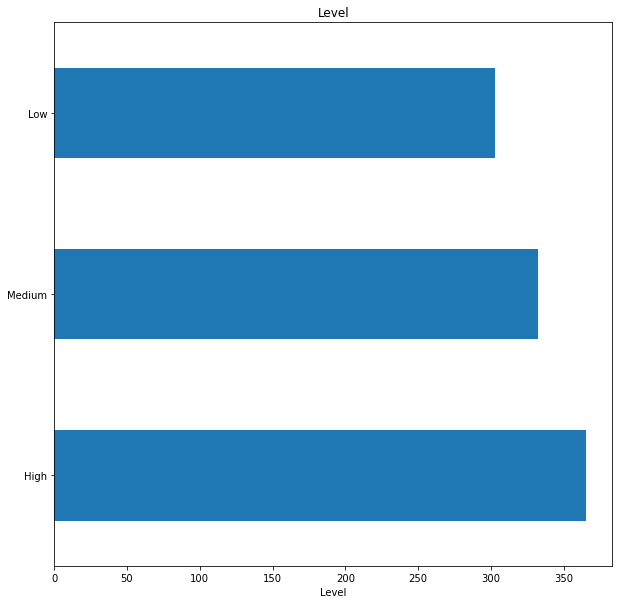

In [27]:
# Visial break down of different levels
df.Level.value_counts().plot(kind='barh', figsize=(10, 10), title='Level')
plt.xlabel('Level');


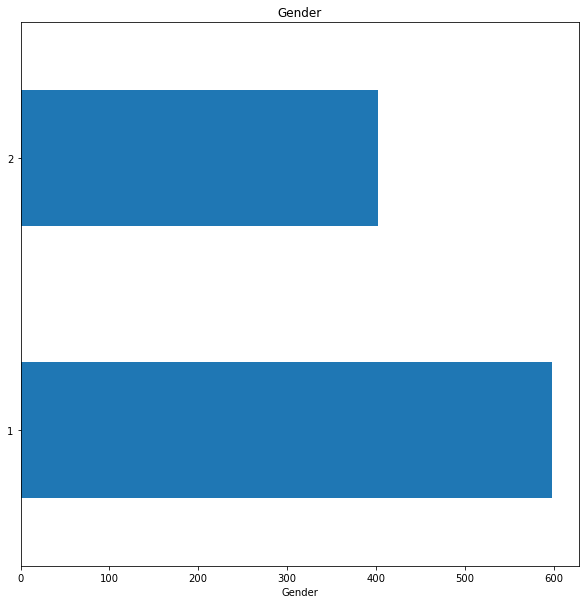

In [14]:
# Visual break down of Gender
df.Gender.value_counts().plot(kind='barh', figsize=(10, 10), title='Gender')
plt.xlabel('Gender');

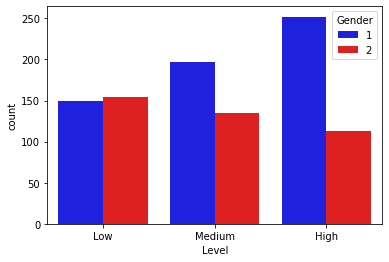

In [25]:
#We see that that males are more corralated with higher level of risk
fig, ax=plt.subplots()
plot=sns.countplot(data=df, x='Level', hue='Gender', palette=['blue','red'])
plot

In [15]:
# Here is the statistical summary of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


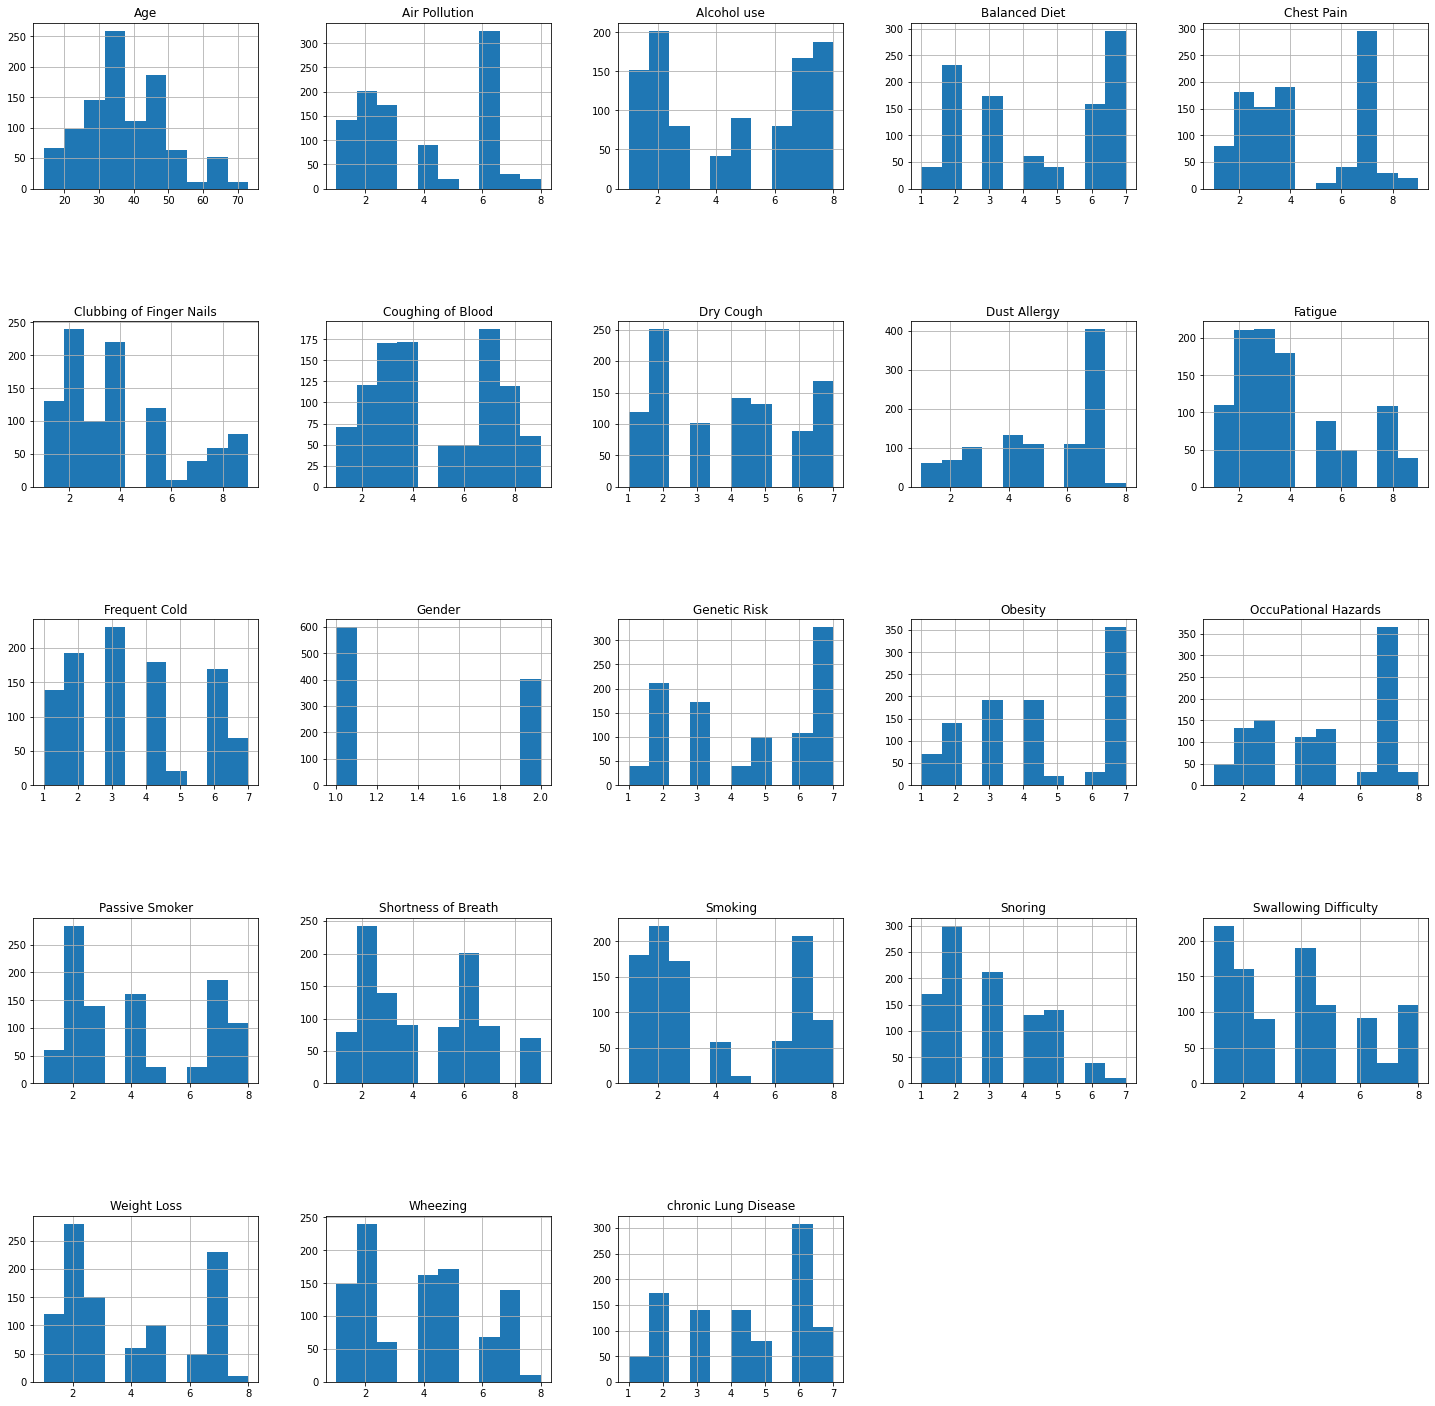

In [16]:
df.hist(figsize=(25,25))
plt.subplots_adjust(hspace=.8);

In [17]:
df.corr()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.814805,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422


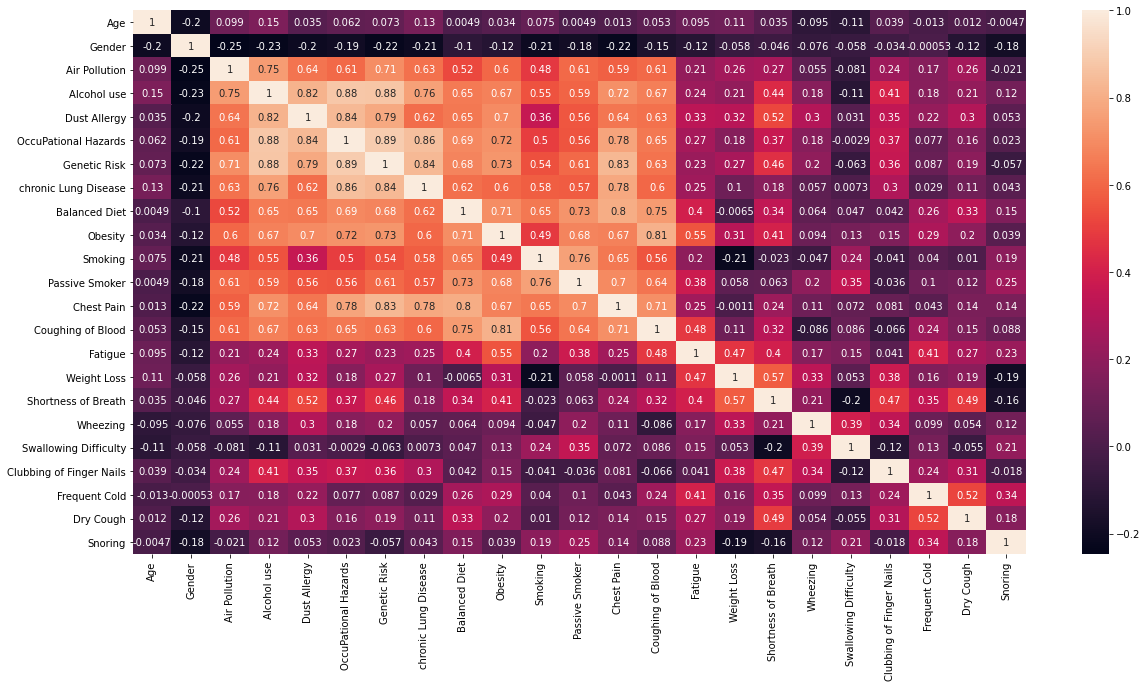

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

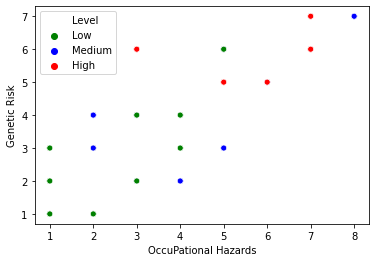

In [39]:
fig, ax=plt.subplots()
plot=sns.scatterplot(data=df, x='OccuPational Hazards',y='Genetic Risk', hue='Level', palette=['green','blue','red'])
plot

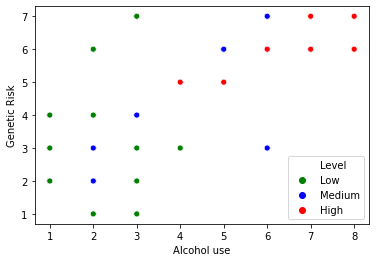

In [40]:
fig, ax=plt.subplots()
plot=sns.scatterplot(data=df, x='Alcohol use',y='Genetic Risk', hue='Level', palette=['green','blue','red'])
plot

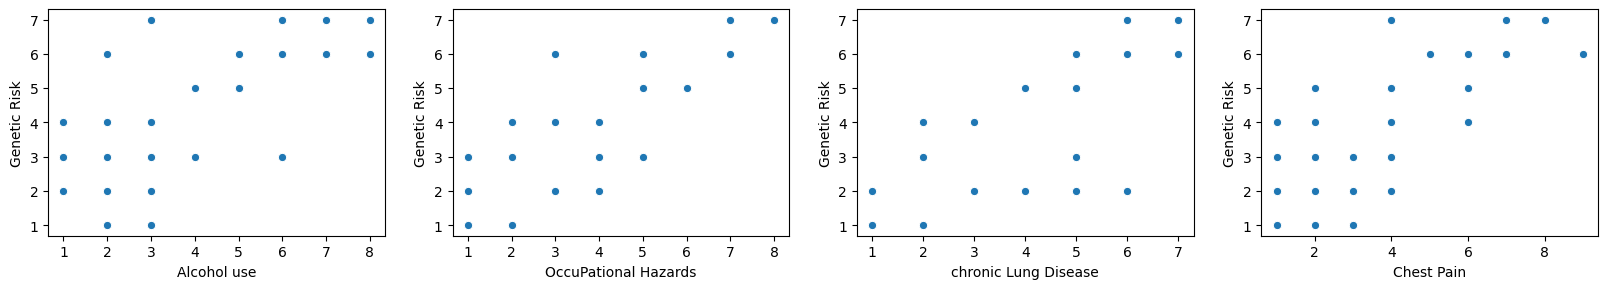

In [44]:
plt.figure(figsize=(20,3),dpi=100)

plt.subplot(1,4,1)
sns.scatterplot(df["Alcohol use"], df["Genetic Risk"])

plt.subplot(1,4,2)
sns.scatterplot(df["OccuPational Hazards"], df["Genetic Risk"])

plt.subplot(1,4,3)
sns.scatterplot(df["chronic Lung Disease"], df["Genetic Risk"])

plt.subplot(1,4,4)
sns.scatterplot(df["Chest Pain"], df["Genetic Risk"]);


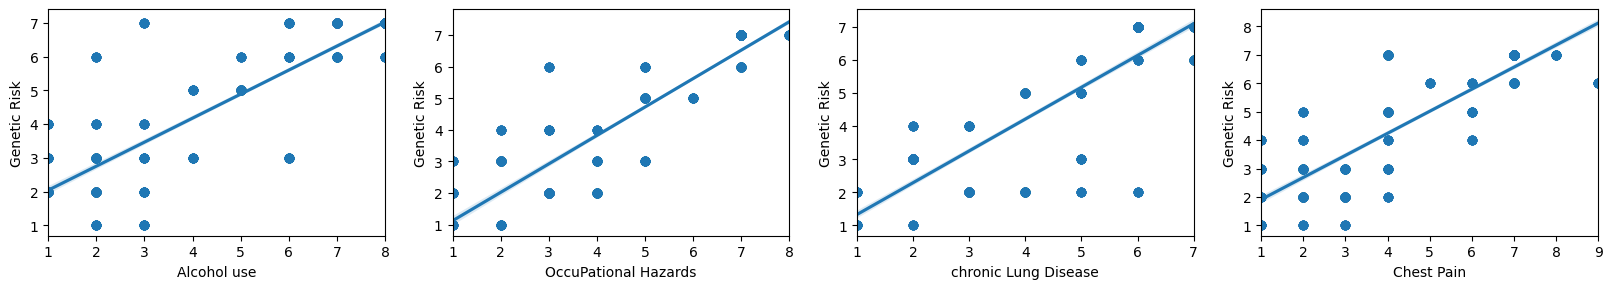

In [49]:
plt.figure(figsize=(20,3),dpi=100)

plt.subplot(1,4,1)
sns.regplot(df["Alcohol use"], df["Genetic Risk"])

plt.subplot(1,4,2)
sns.regplot(df["OccuPational Hazards"], df["Genetic Risk"])

plt.subplot(1,4,3)
sns.regplot(df["chronic Lung Disease"], df["Genetic Risk"])

plt.subplot(1,4,4)
sns.regplot(df["Chest Pain"], df["Genetic Risk"]);

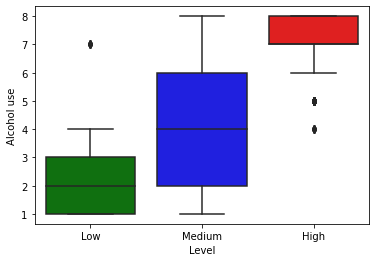

In [67]:

sns.boxplot(data=df, x='Level', y='Alcohol use', palette=['green','blue','red'])


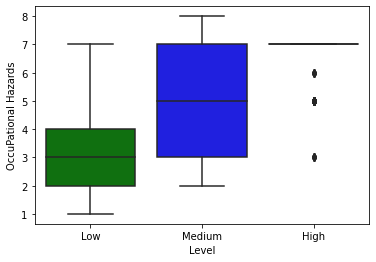

In [68]:
sns.boxplot(data=df, x='Level', y="OccuPational Hazards", palette=['green','blue','red'])

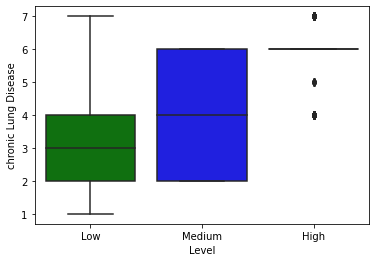

In [69]:
sns.boxplot(data=df, x='Level', y="chronic Lung Disease", palette=['green','blue','red'])

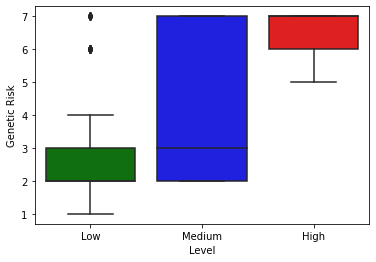

In [70]:
sns.boxplot(data=df, x='Level', y="Genetic Risk", palette=['green','blue','red'])